In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import shapiro, kstest, probplot

In [24]:
dados_vendas = pd.DataFrame({
    'mes': [1,2,3,4,5,6,7,8,9,10,11,12],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
})

<Axes: >

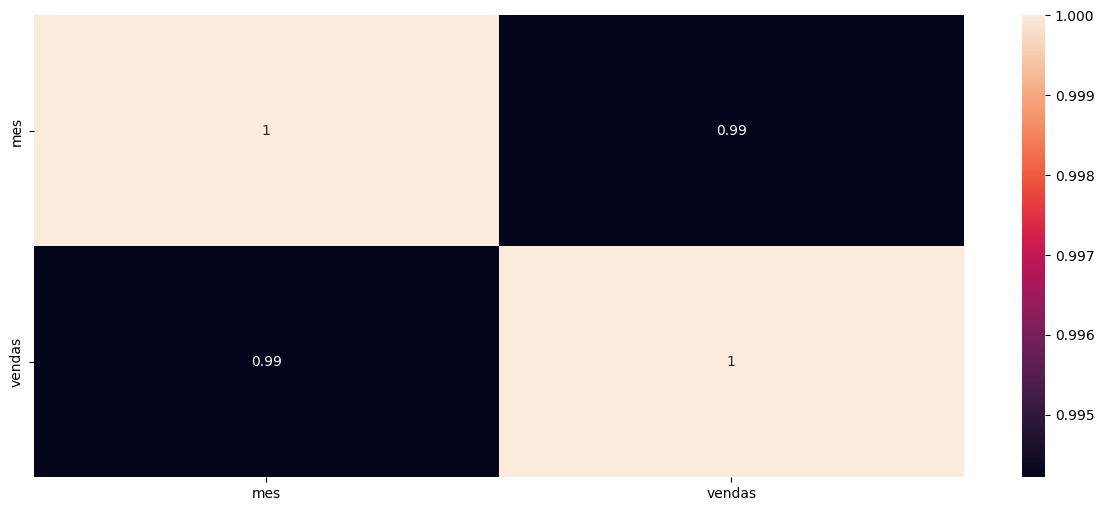

In [25]:
plt.figure(figsize=(15,6))
sns.heatmap(dados_vendas.corr('pearson'), annot=True)

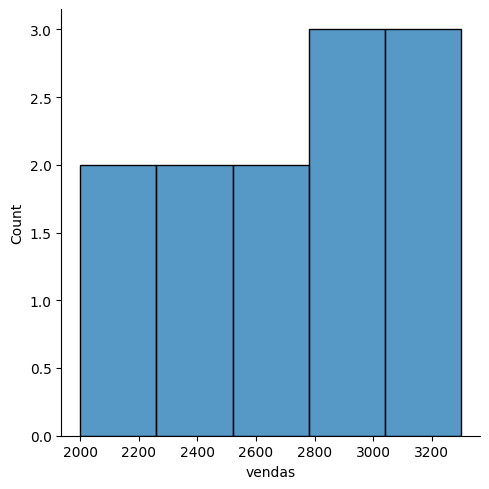

In [26]:
# histograma
sns.displot(dados_vendas,x='vendas')

In [27]:
# Dividir dataset entre treino e teste
# Quando temos apenas uma feature, precisamos ajustar o shape

X = dados_vendas['mes'].values.reshape(-1,1)
y = dados_vendas['vendas'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [28]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [29]:
# Treinas o modelo
reg_model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Imprimir a equação da reta
# y = ax +b
print('A equaçaão da reta é y = {:4f}x + {:4f}'.format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equaçaão da reta é y = 116.666667x + 1958.333333


In [31]:
# Predição dos valores com base nos valores de teste
y_pred = reg_model.predict(X_test)

In [32]:
# Calcular Métrica MAE (Mean Absolute Error)
# Diferença entre o valor predito e o valor de teste (Erro estimado)
# MAE = Media (y_test - y_pred)
# É métrica fácil de interpretar
# MAE é menos sensível a outliers porque não considera os erros quadráticos
mean_absolute_error(y_test, y_pred)

np.float64(37.499999999999886)

In [33]:
# Calcular métrica MSE (Meas Squared Error)
# MSE = Média (y_test - y_pred)ˆ2
# Não é uma métrica de fácil interpretação
# Sensível aos outiers tende a penalizar elevando os erros ao quadrado
mean_squared_error(y_test, y_pred)


np.float64(2013.8888888888846)

In [34]:
# Calcular métrica RMSE (Squared Root Mean Squared Error)
# MSE = raiz (Média (y_test - y_pred)ˆ2)
# Não é uma métrica de fácil interpretação
# Sensível aos outiers tende a penalizar elevando os erros ao quadrado
mean_squared_error(y_test, y_pred, squared=False)

/Users/jamilly/.local/share/virtualenvs/stats_chalenge_ia-TiKQB6LN/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(44.876373392787485)

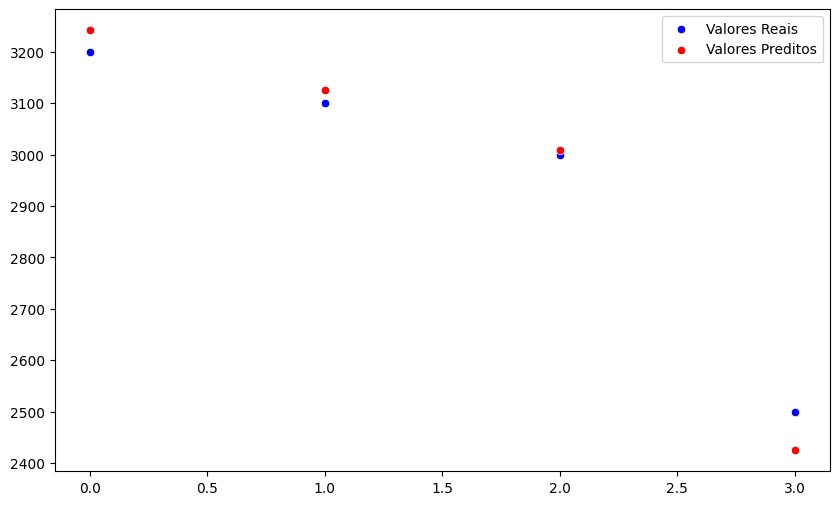

In [35]:
# Análise Gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')
plt.legend()
plt.show()


In [36]:
# Calcular Resíduos
residuos = y_test - y_pred

In [37]:
# Calcular os residuos padronizados (Standardization)
# Que para elemento de um conjunto (X-medio)/ desvio padrão
from scipy.stats import zscore
residuos_std = zscore(residuos)

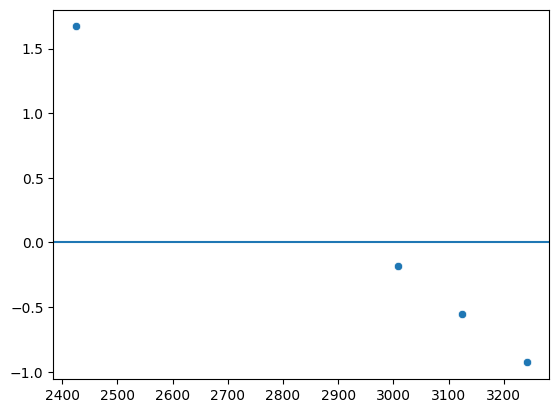

In [38]:
# Verificar linearidade do modelo:
# Se os resíduos estiverem entre -2 e +2 (na escala padrão) - indica linearidade
# Verificar homogeneidade das variância (Homocedasticidade)
# Valor estiver em torno da reta, temos homocedasticidade, caso contráRecursionError
# Se tivermos alguma tendência ou padrão (cone ou funil), há heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1),y=residuos_std.reshape(-1))
plt.axhline(y=0)

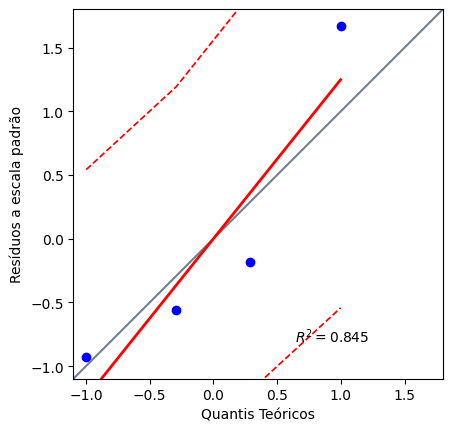

In [39]:
# Checar se resíduos seguem uma distribuição normal
# QQ (Quantile-QUantile) Plot, que avalia se a distribuiçao segue normal
import pingouin as pg 
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos a escala padrão')
plt.show()

In [40]:
# Estatística do Teste e o P Value (Valor de Confiança) - quanto mais próximo de 1 melhor
# Se o resíduo segue 
# A hipotese (h0) nula diz que segue um distribuiçao normal
# A hipotese (h1) alternativa nao segue uma distribuicao normal
# Se o P-valor > 0.05 não rejeita h0, caso contrário rejeitamos
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print('Estatística do Teste: {} e P-Valor: {}'.format(stat_shapiro,p_valor_shapiro))

Estatística do Teste: 0.8542201575348155 e P-Valor: 0.24012271541280814


In [41]:
# Estatística do Teste e o P Value (Valor de Confiança) - quanto mais próximo de 1 melhor
# Se o resíduo segue 
# A hipotese (h0) nula diz que segue um distribuiçao normal
# A hipotese (h1) alternativa nao segue uma distribuicao normal
# Se o P-valor > 0.05 não rejeita h0, caso contrário rejeitamos
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print('Estatística do Teste: {} e P-Valor: {}'.format(stat_ks,p_valor_ks))

Estatística do Teste: 0.75 e P-Valor: 0.0078125


In [43]:
# Se estudar 30.4 horas, qual será minha pontuação prevista no teste?
reg_model.predict([[2]])

array([[2191.66666667]])